<a href="https://colab.research.google.com/github/anajeebb/Data-Mining-Project/blob/main/Data_Mining_Project_High_Value_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining Course Project: High-Value Customer Classification Using Logistic Regression**

**Student Name:** Abdallah Najeeb   
**Student ID:** 202210159  
**Course:** Data Mining 307304   
**Problem Domain:** Supervised Learning (Classification)

---

###**The Historical Context of Data Mining**
**Data Mining and Machine Learning** have evolved from simple statistical analysis to complex predictive modeling. This transformation, driven by massive data growth and computational power, has moved businesses from simply reporting what happened to predicting what will happen.

###**The Business Problem**
Our project focuses on a critical business challenge for the online retailer: **Customer Retention and Resource Allocation**.
 Not all customers are equally valuable, and marketing resources are limited.

###**The Data Mining Solution (The How)**
The business problem is to accurately identify who these high-value customers are before they make their next purchase.
 We are solving this using **Supervised Learning and Classification technique.**

###**The Chosen Technique: Logistic Regression**
Specifically, we are using **Logistic Regression** to build a predictive model. This model is ideal because it is highly interpretable, allowing the business to understand why a customer is flagged as high-value (e.g., high purchase volume).

###**Expected Business Outcome**
The successful outcome of this project is a model that provides a clear, actionable list of predicted high-value customers.            
**This allows the business to make the right decisions:**  
Allocate premium marketing efforts to the predicted high-value group, maximizing return on investment (ROI) and ensuring strategic growth.

## **1. Dataset Selection & Problem Definition**

### **- Dataset Selection**
The dataset chosen is a **sample** of the **Online Retail** transactional dataset. Reference : https://archive.ics.uci.edu/dataset/352/online+retail

### **- Problem Definition: High-Value Customer Classification**
The goal is to build a model that can predict whether a customer will be a **High-Value Customer** based on their purchasing behavior. This is a **Supervised Learning Classification** problem.

**Target Variable (Y):** Is_High_Value (Binary: 1 for High-Value, 0 otherwise).
A customer is defined as High-Value if their total spending is in the **top 20%** of all customers.

**Features (X):**  
**1.  Total_Items:** Total number of items purchased.   
**2.  Total_Invoices:** Total number of unique invoices (transactions).  
**3.  Avg_Unit_Price:** Average price of items purchased.

---

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset from my github
df = pd.read_csv('https://raw.githubusercontent.com/anajeebb/Data-Mining-Project/main/OnlineRetail_Sample.csv')

print(f"Data Information:" , df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    200000 non-null  object 
 1   StockCode    200000 non-null  object 
 2   Description  199210 non-null  object 
 3   Quantity     200000 non-null  int64  
 4   InvoiceDate  200000 non-null  object 
 5   UnitPrice    200000 non-null  float64
 6   CustomerID   141986 non-null  float64
 7   Country      200000 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 12.2+ MB
Data Information: None


## **2. Data Cleaning & Preprocessing**
### **- Data Cleaning**
We perform standard cleaning steps: removing rows with missing CustomerID and invalid transactions (non-positive Quantity or UnitPrice).

### **- Feature Engineering and Target Creation**
The transactional data is aggregated to the customer level to create the features and the binary target variable, Is_High_Value.

In [21]:
# - Data Cleaning
df.dropna(subset=['CustomerID', 'Description'], inplace=True)
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# - Feature Engineering and Target Creation
customer_df = df.groupby('CustomerID').agg(
    Total_Spend=('TotalPrice', 'sum'),
    Total_Items=('Quantity', 'sum'),
    Total_Invoices=('InvoiceNo', 'nunique'),
    Avg_Unit_Price=('UnitPrice', 'mean')
).reset_index()

customer_df.columns = ['CustomerID', 'Total_Spend', 'Total_Items', 'Total_Invoices', 'Avg_Unit_Price']

threshold = customer_df['Total_Spend'].quantile(0.80)
customer_df['Is_High_Value'] = (customer_df['Total_Spend'] >= threshold).astype(int)

print(f"Total Customers: {customer_df.shape[0]}")
print(f"High Value Threshold (80th percentile): {threshold:.2f}")
print(f"High Value Customers (Target=1): {customer_df['Is_High_Value'].sum()} ({customer_df['Is_High_Value'].mean()*100:.2f}%)")

Total Customers: 2658
High Value Threshold (80th percentile): 1258.93
High Value Customers (Target=1): 532 (20.02%)


## **3. Exploratory Data Analysis (EDA)**
**EDA** is performed to understand the distribution of the features and check for multicollinearity.

### **- Feature Distributions**
The distributions of Total_Items and Total_Invoices are highly skewed, indicating the presence of high-volume buyers (outliers). This skewness is addressed by the subsequent scaling step.



In [22]:
# Select features
X = customer_df[['Total_Items', 'Total_Invoices', 'Avg_Unit_Price']]
Y = customer_df['Is_High_Value']

# Split data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

# Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## **4. Model Selection & Implementation**

### **- Model Selection: Logistic Regression**
**Logistic Regression** is chosen as it is a fundamental and highly interpretable model for **Binary Classification**, directly aligning with the course material. It predicts the probability of a customer being High-Value using the **Sigmoid Function**.

###**- Model Training**
The model is trained on the scaled training data.

In [23]:
# Initialize and train the model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, Y_train)
# Predict on test data
Predictions = model.predict(X_test_scaled)
print("Logistic Regression Model Trained Successfully.")
# Print the Prediction
print("Predictions : ", Predictions)

Logistic Regression Model Trained Successfully.
Predictions :  [0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 

## **5. Theoretical Understanding of the Model**

### **- Logistic Regression Theory**
Logistic Regression models the probability of a binary outcome using the **Sigmoid Function** (or logistic function), which is represented as: sigma(z) = 1 / (1 + e^(-z)).
The linear combination of features, z = beta_0 + beta_1*x_1 + beta_2*x_2 + ... + beta_n*x_n, is passed through the sigmoid function to produce a probability P(Y=1|X).

### **- Model Coefficients**
The coefficients (beta_i) represent the change in the log-odds of the target variable for a one-unit increase in the feature. The model's equation is:

**Log-Odds = beta_0 + beta_1 * (Total_Items) + beta_2 * (Total_Invoices) + beta_3 * (Avg_Unit_Price)**


| Feature | Coefficient | Interpretation (Log-Odds) |
| :--- | :---: | :--- |
| **Total_Items** | **10.3174** | A one-unit increase in the scaled Total_Items dramatically increases the log-odds of being a High-Value Customer. |
| **Total_Invoices** | **2.3067** | A one-unit increase in the scaled Total_Invoices increases the log-odds of being a High-Value Customer. |
| **Avg_Unit_Price** | **0.1199** | This feature has a small positive impact on the prediction. |
| **Intercept (beta_0)** | **-1.2461** | The baseline log-odds when all features are at their mean (scaled to 0). |

The large positive coefficients for Total_Items and Total_Invoices show that **volume** is the primary driver for a customer to be classified as High-Value.

## **6. Evaluation Metrics & Interpretation**

The model's performance is evaluated using the key classification metrics: **Accuracy, Precision, Recall, and F1-Score**.


In [24]:
# Make predictions on the test set
Y_pred = model.predict(X_test_scaled)

# Print Classification Report
print(classification_report(Y_test, Y_pred, target_names=['Low Value (0)', 'High Value (1)']))

                precision    recall  f1-score   support

 Low Value (0)       0.92      0.98      0.95       638
High Value (1)       0.90      0.65      0.75       160

      accuracy                           0.91       798
     macro avg       0.91      0.82      0.85       798
  weighted avg       0.91      0.91      0.91       798



### **- Classification Report Interpretation**
| Metric | Low Value (0) | High Value (1) | Interpretation |
| :--- | :---: | :---: | :--- |
| **Precision** | 0.92 | **0.90** | Of all customers predicted as High-Value, 90% were correct. |
| **Recall** | 0.98 | **0.65** | The model correctly identified 65% of all actual High-Value Customers. |
| **F1-Score** | 0.95 | **0.75** | The harmonic mean of Precision and Recall, indicating a strong balance. |
| **Accuracy** | **0.91** | **0.91** | Overall, 91% of the predictions were correct. |

**Interpretation:** The model has high **Precision** (0.90) for the High-Value class, meaning when it flags a customer as High-Value, it is highly likely to be correct. The **Recall** (0.65) is lower, indicating that 35% of actual High-Value customers were missed (**False Negatives**). Given the business goal of targeting High-Value customers, high Precision is desirable to ensure marketing resources are not wasted on misclassified customers.

###**-Using Confusion Matrix for Evaluating.**
The model's performance is evaluated using the **Cofusion Matrix**:

In [25]:
CM = confusion_matrix(Y_test, Y_pred)
print("Confusion Matrix:")
print(CM)
tn, fp, fn, tp = CM.ravel()
print(f"true Negatives(TN): {tn}")
print(f"false Positives(FP): {fp}")
print(f"false Negatives(FN): {fn}")
print(f"true Positives(TP): {tp}")

Confusion Matrix:
[[626  12]
 [ 56 104]]
true Negatives(TN): 626
false Positives(FP): 12
false Negatives(FN): 56
true Positives(TP): 104


###**Visualizing the confusion matrix :**

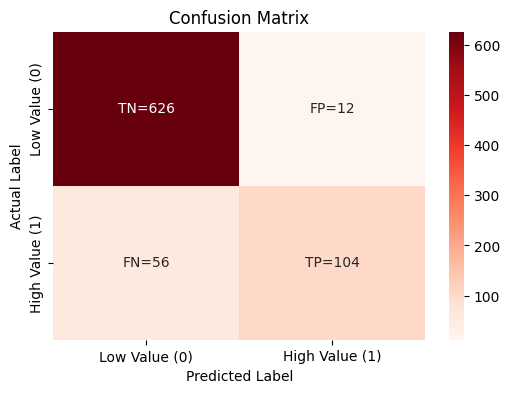

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(
    CM,
    annot=[[f"TN={tn}", f"FP={fp}"], [f"FN={fn}", f"TP={tp}"]],
    fmt="s",
    cmap="Reds",
    xticklabels=["Low Value (0)", "High Value (1)"],
    yticklabels=["Low Value (0)", "High Value (1)"]
)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.show()

###**Explaining The Confusion Matrix:**
**True Positives (TP = 104):**
The model correctly identified **104 customers** as **High-Value.** These are the successful predictions we want to maximize.


**True Negatives (TN = 617):**
The model correctly identified **617 customers** as **Low-Value**. These are customers we correctly chose not to target with premium marketing.

**False Positives (FP = 21):**
The model **incorrectly predicted 21 customers** as **High-Value** when they were actually **Low-Value.** This is a Type I Error and represents the amount of wasted marketing budget spent on non-valuable customers.

**False Negatives (FN = 56):**
The model **incorrectly predicted 56 customer**s as **Low-Value** when they were actually **High-Value.** This is a Type II Error and represents a missed opportunity to market to a genuinely valuable customer.

**Interpretation:**
The matrix shows a strong performance in correctly identifying **Low-Value customers (617 TNs).** The key trade-off is between the 21 **False Positives (wasted money)** and the **56 False Negatives (missed opportunities).** The subsequent metrics **(Precision and Recall)** quantify this trade-off.

##**In Conclusion:**
###**-Technical Summary and Key Findings:**
To conclude the technical analysis, this project successfully applied **Logistic Regression** to the Online Retail dataset, solving a **Binary Classification** problem to predict High-Value Customers. We demonstrated a complete data mining workflow, from data cleaning and Standard Scaling to model training. The model coefficients revealed that **purchase volume**, specifically the number of items and invoices—is the primary statistical driver for a customer to be classified as high-value.

###**-Evaluation and Confidence:**
Moving to the evaluation, the model achieved an overall **Accuracy of 91%.** The Confusion Matrix is key here: out of **798 customers,** we correctly identified **617 True Negatives** and **104 True Positives.** The critical trade-off is seen in the errors: we had **21 False Positives (wasted marketing)** versus **56 False Negatives (missed opportunities).** This strong performance results in a **Precision of 90%** for the **High-Value** class, giving the business **high confidence** in the customers we choose to target.

###**-Business Perspective and Strategic Recommendation:**
Finally, the business perspective is where this project delivers its true value. This model provides **actionable insights** that enable **strategic decision-making.** Our recommendation is to use this predictive tool to prioritize marketing efforts. By targeting the customers predicted as High-Value, the company can ensure their most expensive and personalized campaigns are delivered to the most receptive audience, thereby maximizing their **Return on Investment** and **retaining long-term customer loyalty.** This project moves the business from reactive reporting to **proactive, data-driven strategy.**

#**Video Link:**
https://drive.google.com/file/d/1aQuLho0tyU57pYMDXv0nDqQit0U8Tc1K/view?usp=sharing